# **Step by Step Building of Shor's Algotithm** 

1. QFT : Quantum Fourior Transform 

## Basic Imports 

In [1]:
import numpy as np 
import qiskit as q
from qiskit import quantum_info as qi
from qiskit.visualization import plot_bloch_multivector, plot_bloch_vector, plot_histogram
from matplotlib import pyplot as plt
from IPython.display import display as disp

## Quantum Fourior Transform 

In [55]:
style={"backgroundcolor": "black","linecolor": "#ddddee", "textcolor": "#fffffe",
       'subtextcolor':'fffffe','fontsize':12,'subfontsize':9,
       "displaycolor": {
        # "x": [ # gate name
        #     "#da1e28", # box color (red)
        #     "#FFFFFF" # box text color (white)
        # ],
        # "h": [ # gate name
        #     "#da1e28", # box color (red)
        #     "#FFFFFF" # box text color (white)
        # ],
        # "cx": [ # gate name
        #     "#da1e28", # box color (red)
        #     "#FFFFFF" # box text color (white)
        # ],
        # "ry": [ # gate name
        #     "#da1e28", # box color (red)
        #     "#FFFFFF" # box text color (white)
        # ],
        "measure":["#8900aa","white"]
    },
       }

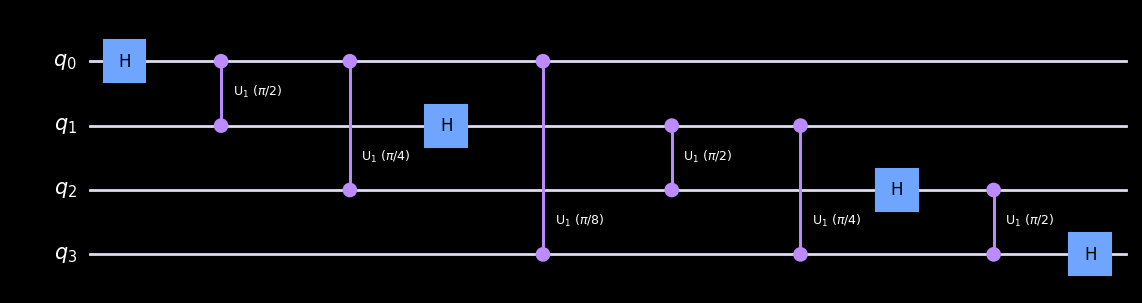

In [56]:
n_qubit = 4
fourior_circuit = q.QuantumCircuit(n_qubit, name = "QFT")

for qubit in range(n_qubit):
    fourior_circuit.h(qubit)
    for o_qubit in range(qubit+1,n_qubit):
        cu1 = q.circuit.library.CU1Gate(np.pi/(2**(o_qubit-qubit)))
        fourior_circuit.append(cu1,[o_qubit, qubit])
fourior_circuit.draw('mpl', style=style, fold=False)


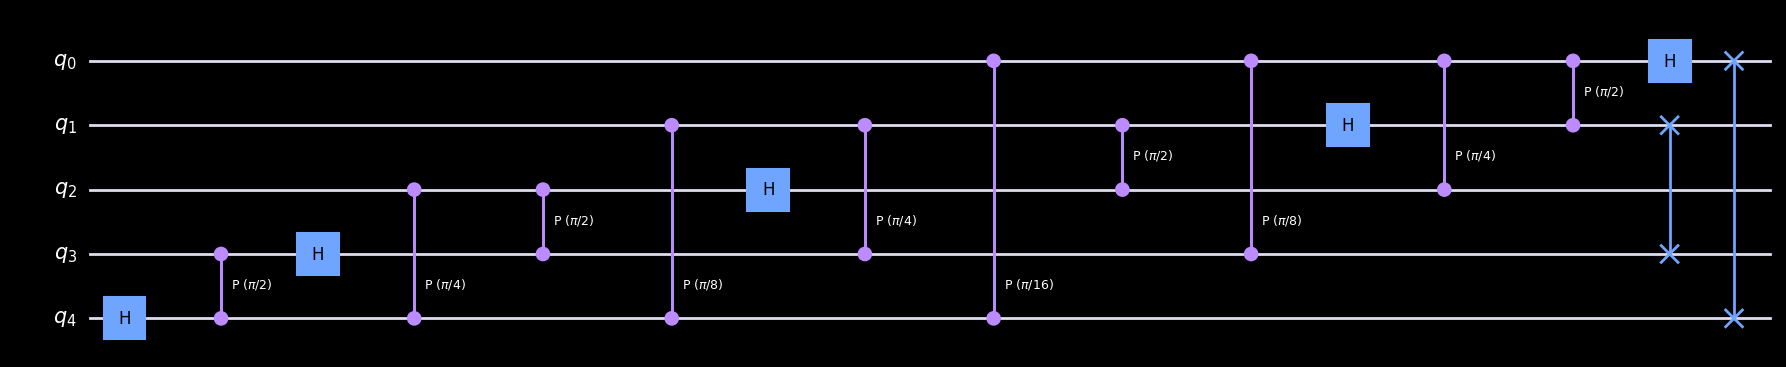

In [57]:
from qiskit.circuit.library import QFT
fc = QFT(5).decompose()
fc.draw('mpl',style=style, fold=False)

In [58]:
from qiskit import Aer
sv_sim = Aer.get_backend('statevector_simulator')

In [59]:
my_circuit_sv = q.execute(fourior_circuit,sv_sim).result().get_statevector()
qiskit_circuit_sv =  q.execute(fc,sv_sim).result().get_statevector()

disp(my_circuit_sv.draw('latex'))
disp(qiskit_circuit_sv.draw('latex'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Quanum Phase Estimation 

**Goal** : To find the global phase of a qubit 

### Single Qubit Phase Estimation

In [60]:
def counts_probablity(counts, qbit = '0'):
    return counts['0']/sum(counts.values())
counts_probablity({'0': 75207, '1': 24793})

0.75207

In [65]:
from qiskit.circuit.library import CU1Gate
phase = np.deg2rad(90)
cu1 = CU1Gate(phase)

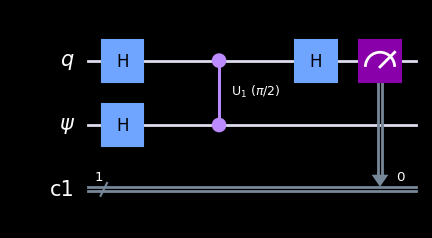

In [66]:

psi = q.QuantumRegister(1, name='\psi')
q1 = q.QuantumRegister(1, name='q')
c1 = q.ClassicalRegister(1,name='c1')
circ = q.QuantumCircuit(q1,psi,c1)
circ.h(1)
# circ.s(1)
circ.h(0)
# circ.cu(0,1)
circ.append(cu1,[0,1])
circ.h(0)
circ.measure(0,0)

circ.draw('mpl',style=style)
# def add_phase(circ):

In [67]:
qasm_sim = Aer.get_backend('qasm_simulator')
counts = q.execute(circ, qasm_sim, shots=100000).result().get_counts()
print(counts)
prob = counts_probablity(counts)
print(f'Probablity = {prob}')

{'1': 24994, '0': 75006}
Probablity = 0.75006


In [68]:
estimate_phase = np.rad2deg(prob/2)
estimate_phase

21.487636190791264